In [7]:
# algorithm 1
def mediana_A(l):
    l = sorted(l)
    n = len(l)
    #print(l)
    #print(l[len(l)//2])
    if n % 2 == 0:
      return (sum(l[n//2-1:n//2+1])/2.0)
    else:
      return l[n//2]

#print(mediana_A([1, -4, -1, -1, 1, -3, 4, 3, 5, 8, 7, -5]))

# algorithm 2
def mediana_B(l):
  n = len(l)
  for i in range(n-1):
      minIndex = i
      for j in range(i,n):
        if l[j] < l[minIndex]:
            minIndex = j
      l[i],l[minIndex] = l[minIndex],l[i]

  #print(l)
  #print(sorted(l)[len(l)//2])
  return (sum(l[n//2-1:n//2+1])/2.0, l[n//2])[n % 2] if n else None

#print(mediana_B([1, -4, -1, -1, 1, -3, 4, 3, 5, 6]))

In [19]:
import time
from numpy import random
DOMAIN = 1000000000 #1B
 
def avgTime(func, tam, num_rounds, debug):
  t = 0
  for i in range(num_rounds):    
    random.seed(tam+i)
    #create a list with random numbers
    dataList = list(random.randint(DOMAIN, size=tam))
    start = time.time()
    m = func(dataList)
    end = time.time()
    t += end - start

    if debug:
      assert m == sorted(dataList)[len(dataList)//2]          
      
  return t/num_rounds

#defines the algorithms to be processed
algorithms = [mediana_A, mediana_B]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 100

sizes = [100,1000,2000,4000,5000]
mapSizeToTime = dict()
for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], num_rounds, False)
    print(mapSizeToTime)
  
print(f"Finish data collection")

Starting round 1, size=100
{'mediana_A##100': 4.587411880493164e-05}
{'mediana_A##100': 4.587411880493164e-05, 'mediana_B##100': 0.0004264473915100098}
Starting round 2, size=1000
{'mediana_A##100': 4.587411880493164e-05, 'mediana_B##100': 0.0004264473915100098, 'mediana_A##1000': 0.0003231406211853027}
{'mediana_A##100': 4.587411880493164e-05, 'mediana_B##100': 0.0004264473915100098, 'mediana_A##1000': 0.0003231406211853027, 'mediana_B##1000': 0.040507924556732175}
Starting round 3, size=2000
{'mediana_A##100': 4.587411880493164e-05, 'mediana_B##100': 0.0004264473915100098, 'mediana_A##1000': 0.0003231406211853027, 'mediana_B##1000': 0.040507924556732175, 'mediana_A##2000': 0.0007016658782958984}
{'mediana_A##100': 4.587411880493164e-05, 'mediana_B##100': 0.0004264473915100098, 'mediana_A##1000': 0.0003231406211853027, 'mediana_B##1000': 0.040507924556732175, 'mediana_A##2000': 0.0007016658782958984, 'mediana_B##2000': 0.1618851137161255}
Starting round 4, size=4000
{'mediana_A##100':

In [20]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
#df

                     Time  Algorithm  Size
mediana_A##100   0.000046  mediana_A   100
mediana_B##100   0.000426  mediana_B   100
mediana_A##1000  0.000323  mediana_A  1000
mediana_B##1000  0.040508  mediana_B  1000
mediana_A##2000  0.000702  mediana_A  2000
mediana_B##2000  0.161885  mediana_B  2000
mediana_A##4000  0.001502  mediana_A  4000
mediana_B##4000  0.650159  mediana_B  4000
mediana_A##5000  0.001971  mediana_A  5000
mediana_B##5000  1.011428  mediana_B  5000


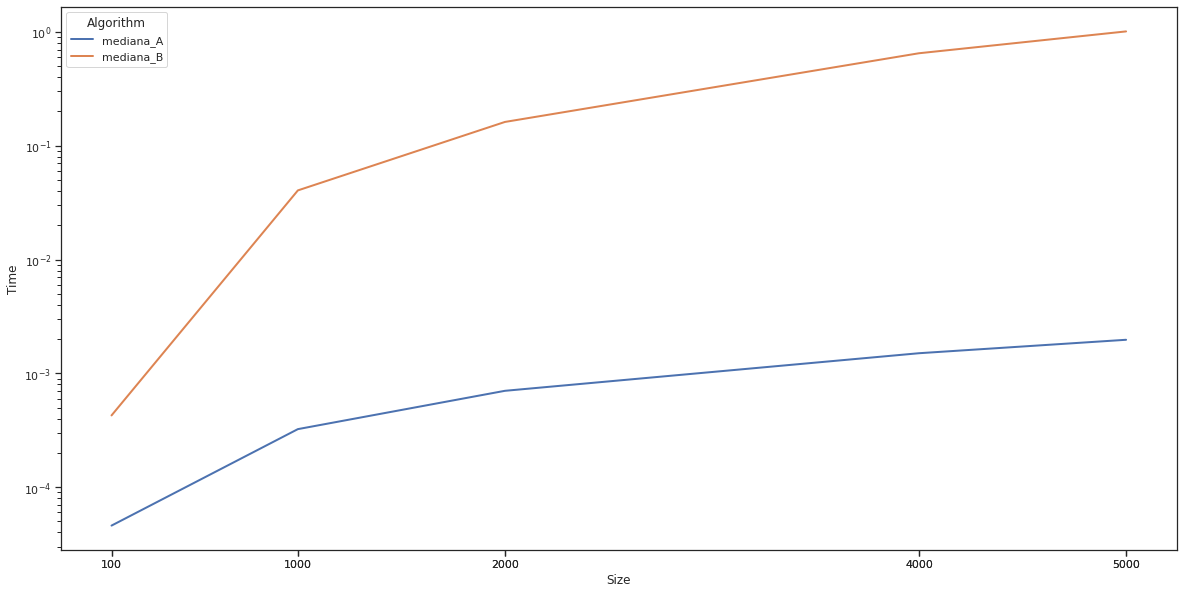

<Figure size 1440x720 with 0 Axes>

In [21]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

print(df)
g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
fig = plt.figure()
g.set(xticks=[i for i in df.Size])
g.set_yscale('log')
plt.show()